YAHOO FINANCE API DATA

In [13]:
import datetime as dt
import pandas_datareader.data as pdr
import yfinance as yf

#solve string problem
yf.pdr_override()
#starting setup
y_symbols = ['GOOGL']
from datetime import datetime
startdate = datetime(2015,1,1)
enddate = datetime.now()
data = pdr.get_data_yahoo(y_symbols,start=startdate, end=enddate)

data


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,26.629999,26.790001,26.393999,26.477501,26.477501,26480000
2015-01-05,26.357500,26.399500,25.887501,25.973000,25.973000,41182000
2015-01-06,26.025000,26.060499,25.277500,25.332001,25.332001,54456000
2015-01-07,25.547501,25.574499,25.182501,25.257500,25.257500,46918000
2015-01-08,25.075500,25.375000,24.750999,25.345501,25.345501,73054000
...,...,...,...,...,...,...
2023-06-22,120.000000,123.239998,118.830002,123.150002,123.150002,26952200
2023-06-23,121.379997,122.790001,121.059998,122.339996,122.339996,34885300
2023-06-26,120.760002,122.000000,118.269997,118.339996,118.339996,33969900


SHIFTING PERIODS

In [14]:
import datetime as dt
import pandas_datareader.data as pdr
import yfinance as yf

#solve string problem
yf.pdr_override()
#starting setup
y_symbols = ['TSLA']
from datetime import datetime
startdate = datetime(2015,1,1)
enddate = datetime.now()
data = pdr.get_data_yahoo(y_symbols,start=startdate, end=enddate)

data

#shifting periods
data['shifted'] = data.Close.shift() #default: periods=1 forward
data['lagged'] = data.Close.shift(periods=-1) #1period back in time
data[['Close','shifted','lagged']]

[*********************100%***********************]  1 of 1 completed


,Close,shifted,lagged
Date,,,
2015-01-02,14.620667,NaN,14.006000
2015-01-05,14.006000,14.620667,14.085333
2015-01-06,14.085333,14.006000,14.063333
2015-01-07,14.063333,14.085333,14.041333
2015-01-08,14.041333,14.063333,13.777333
...,...,...,...
2023-06-22,264.609985,259.459991,256.600006
2023-06-23,256.600006,264.609985,241.050003
2023-06-26,241.050003,256.600006,250.210007


In [15]:
#call Financial Return
#calculate Rate of Change x**t / x**t-1
data['change'] = data.Close.div(data.shifted)
data[['Close','shifted','change']].head()

,Close,shifted,change
Date,,,
2015-01-02,14.620667,NaN,NaN
2015-01-05,14.006000,14.620667,0.957959
2015-01-06,14.085333,14.006000,1.005664
2015-01-07,14.063333,14.085333,0.998438
2015-01-08,14.041333,14.063333,0.998436


In [16]:
#calculate one-period percent change
data['return'] = data.change.sub(1).mul(100)
data[['Close','shifted','change','return']].head()

,Close,shifted,change,return
Date,,,,
2015-01-02,14.620667,NaN,NaN,NaN
2015-01-05,14.006000,14.620667,0.957959,-4.204103
2015-01-06,14.085333,14.006000,1.005664,0.566424
2015-01-07,14.063333,14.085333,0.998438,-0.156193
2015-01-08,14.041333,14.063333,0.998436,-0.156431


In [17]:
#.diff() difference in value for 2 adjacent periods x**t - x**t-1
data['diff'] = data.Close.diff()
data[['Close','diff']].head()

,Close,diff
Date,,
2015-01-02,14.620667,NaN
2015-01-05,14.006000,-0.614668
2015-01-06,14.085333,0.079333
2015-01-07,14.063333,-0.022000
2015-01-08,14.041333,-0.021999


In [18]:
# .pct_change() percent change for two adjacent periods x**t/x**t-1
data['pct_change'] = data.Close.pct_change().mul(100)
data[['Close','return','pct_change']].head()

,Close,return,pct_change
Date,,,
2015-01-02,14.620667,NaN,NaN
2015-01-05,14.006000,-4.204103,-4.204103
2015-01-06,14.085333,0.566424,0.566424
2015-01-07,14.063333,-0.156193,-0.156193
2015-01-08,14.041333,-0.156431,-0.156431


In [19]:
#data points several periods apart
data['return_3d'] = data.Close.pct_change(periods=3).mul(100)
data[['Close','return_3d']].head()

,Close,return_3d
Date,,
2015-01-02,14.620667,NaN
2015-01-05,14.006000,NaN
2015-01-06,14.085333,NaN
2015-01-07,14.063333,-3.811966
2015-01-08,14.041333,0.252275


[*********************100%***********************]  1 of 1 completed


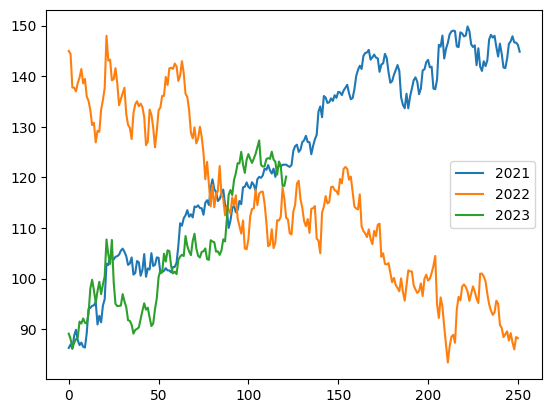

In [11]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup
y_symbols = ['GOOGL']
from datetime import datetime
startdate = datetime(2007,1,1)
enddate = datetime.now()
google = pdr.get_data_yahoo(y_symbols,start=startdate, end=enddate)
# Create dataframe prices here
prices = pd.DataFrame()
#prices

# Select data for each year and concatenate with prices here 
for year in ['2021','2022','2023']:
    price_per_year = google.loc[year, ['Close']].reset_index(drop=True)
    price_per_year.rename(columns={'Close': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)


# Plot prices
prices.plot()
plt.show()


[*********************100%***********************]  1 of 1 completed


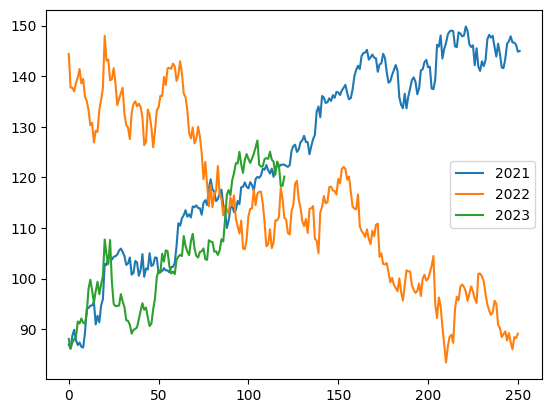

In [5]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup
y_symbols = ['GOOGL']
from datetime import datetime
startdate = datetime(2007,1,1)
enddate = datetime.now()
google = pdr.get_data_yahoo(y_symbols,start=startdate, end=enddate)
# Create dataframe prices here
prices = pd.DataFrame()

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods=-1) 
google['shifted'] = google.Close.shift() #default: periods=1 forward

# Select data for each year and concatenate with prices here 
for year in ['2021','2022','2023']:
    price_per_year = google.loc[year, ['lagged']].reset_index(drop=True)
    price_per_year.rename(columns={'lagged': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

#google.plot(x='Date', y=['shifted', 'lagged'])
prices.plot()
plt.show()


